In [1]:
from __future__ import print_function
from __future__ import division
from past.utils import old_div
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model_small import _netG
import numpy as np
import utils
from matplotlib import colors


from torch.autograd.functional import jacobian

### Load the images

In [11]:
jacob_64_474 = torch.load("jacobians/jacob_64px_202474.pkl")
input_cropped_64_474 = torch.load("jacobians/input_cropped_64px_202474.pkl")
jacob_64_535 = torch.load("jacobians/jacob_64px_202535.pkl")
input_cropped_64_535 = torch.load("jacobians/input_cropped_64px_202535.pkl")
jacob_16_474 = torch.load("jacobians/jacob_202474.pkl")
input_cropped_16_474 = torch.load("jacobians/input_cropped_202474.pkl")
jacob_16_535 = torch.load("jacobians/jacob_202535.pkl")
input_cropped_16_535 = torch.load("jacobians/input_cropped_202535.pkl")

In [12]:
jacob_64_474 = jacob_64_474[0,:,:,:,0,:,:,:]
input_cropped_64_474 = input_cropped_64_474[0,:,:,:]
jacob_64_535 = jacob_64_535[0,:,:,:,0,:,:,:]
input_cropped_64_535 = input_cropped_64_535[0,:,:,:]
jacob_16_474 = jacob_16_474[0,:,:,:,0,:,:,:]
input_cropped_16_474 = input_cropped_16_474[0,:,:,:]
jacob_16_535 = jacob_16_535[0,:,:,:,0,:,:,:]
input_cropped_16_535 = input_cropped_16_535[0,:,:,:]

In [13]:
print(jacob_64_474.shape)
print(jacob_64_535.shape)
print(jacob_16_535.shape)
print(jacob_16_474.shape)

torch.Size([3, 64, 64, 3, 128, 128])
torch.Size([3, 64, 64, 3, 128, 128])
torch.Size([3, 16, 16, 3, 128, 128])
torch.Size([3, 16, 16, 3, 128, 128])


### Pixel impact - 64x64

In [48]:
cmap='binary'

In [49]:
vmin = 0
vmax = abs(jacob_64_474).max()*0.2
norm = colors.Normalize(vmin=vmin, vmax=vmax)

Weight from each input pixel on a specific output pixel


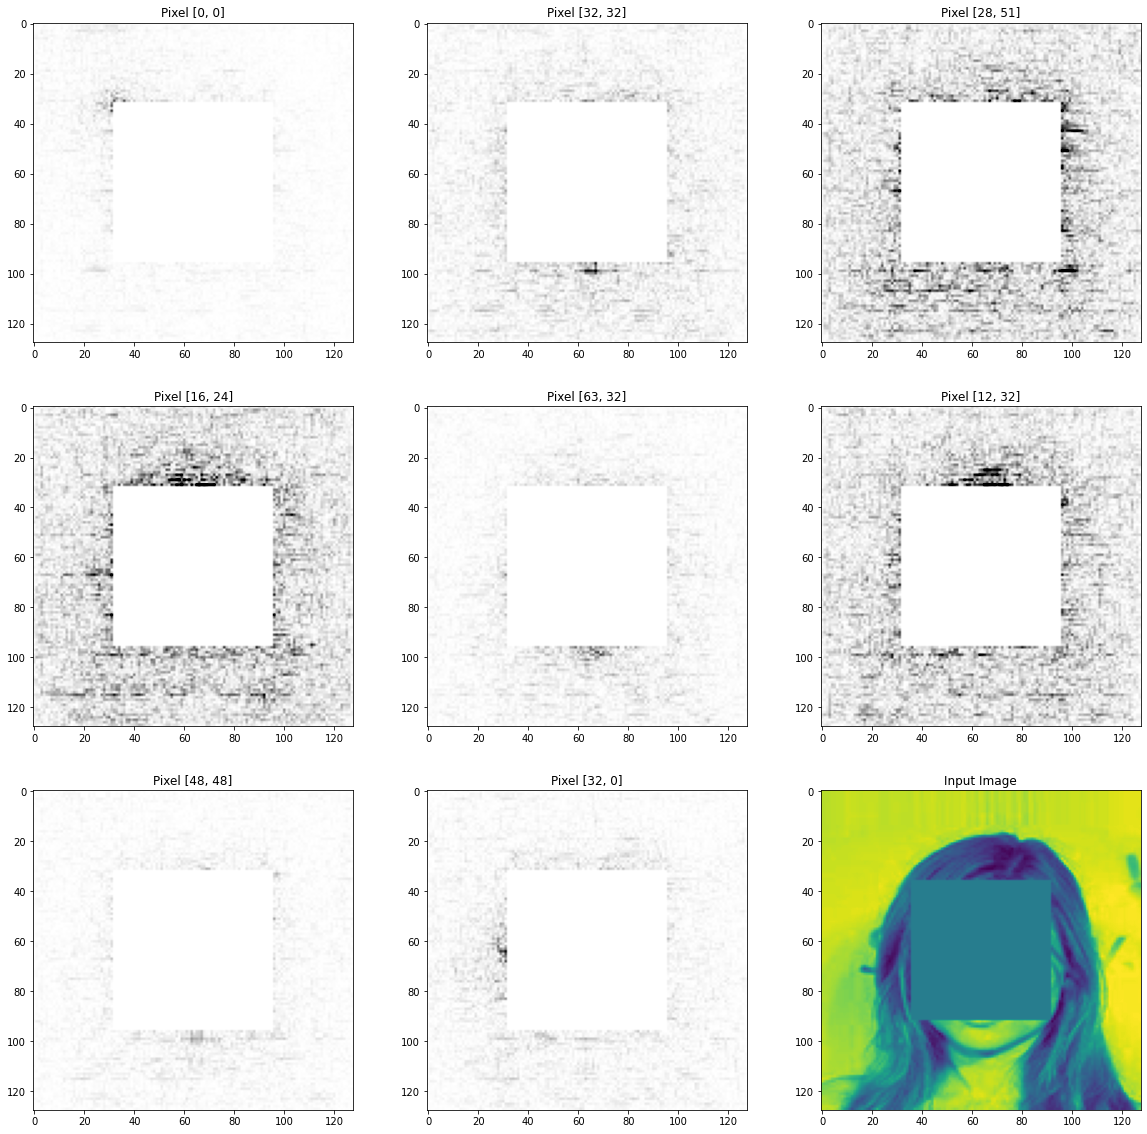

In [50]:
print("Weight from each input pixel on a specific output pixel")

# Looking for particular features
px0 = [0,0] 
px1 = [32,32] # Center
px2 = [28,63-12] # Eyes?
px3 = [16,24] # Other eye
px4 = [63,32] # Mouth
px5 = [12,32]
px6 = [48,48]
px7 = [32,0]
channel = 0

jacob_64_474[:,:,:,:,32:96,32:96] = 0
fig, ((ax0,ax1,ax2),(ax3, ax4, ax5),(ax6,ax7,ax8)) = plt.subplots(3, 3, figsize=(20,20))

ax0.set_title("Pixel "+str(px0))
ax1.set_title("Pixel "+str(px1))
ax2.set_title("Pixel "+str(px2))
ax3.set_title("Pixel "+str(px3))
ax4.set_title("Pixel "+str(px4))
ax5.set_title("Pixel "+str(px5))
ax6.set_title("Pixel "+str(px6))
ax7.set_title("Pixel "+str(px7))
ax8.set_title("Input Image")

im = ax0.imshow(abs(jacob_64_474[channel,px0[0],px0[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax1.imshow(abs(jacob_64_474[channel,px1[0],px1[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax2.imshow(abs(jacob_64_474[channel,px2[0],px2[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax3.imshow(abs(jacob_64_474[channel,px3[0],px3[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax4.imshow(abs(jacob_64_474[channel,px4[0],px4[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax5.imshow(abs(jacob_64_474[channel,px5[0],px5[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax6.imshow(abs(jacob_64_474[channel,px6[0],px6[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax7.imshow(abs(jacob_64_474[channel,px7[0],px7[1],0,:,:]),cmap=cmap).set_norm(norm)
im = ax8.imshow(input_cropped_64_474[channel,:,:])

# fig.colorbar(im7,ax=im7,orientation='horizontal', fraction=.1)

### 16X16 image

In [51]:
vmin = 0
vmax = abs(jacob_16_474).max()*0.1
norm_16 = colors.Normalize(vmin=vmin, vmax=vmax)

Weight from each input pixel on a specific output pixel


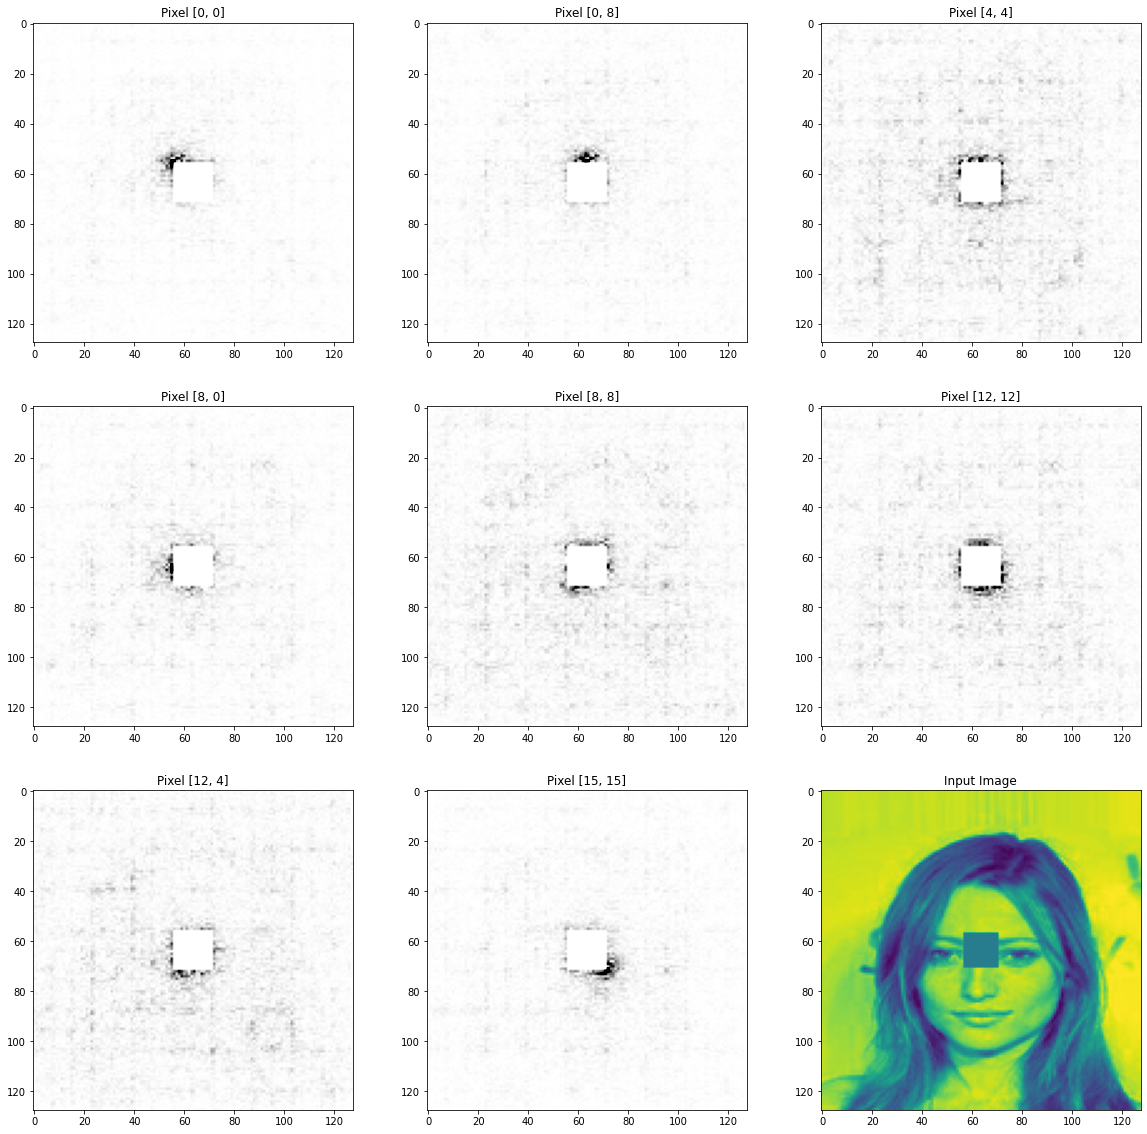

In [52]:
print("Weight from each input pixel on a specific output pixel")

# Looking for particular features
px0 = [0,0] 
px1 = [0,8] 
px2 = [4,4] 
px3 = [8,0] 
px4 = [8,8] 
px5 = [12,12] 
px6 = [12,4] 
px7 = [15,15]
channel = 0

jacob_16_474[:,:,:,:,56:72,56:72] = 0
fig, ((ax0,ax1,ax2),(ax3, ax4, ax5),(ax6,ax7,ax8)) = plt.subplots(3, 3, figsize=(20,20))

ax0.set_title("Pixel "+str(px0))
ax1.set_title("Pixel "+str(px1))
ax2.set_title("Pixel "+str(px2))
ax3.set_title("Pixel "+str(px3))
ax4.set_title("Pixel "+str(px4))
ax5.set_title("Pixel "+str(px5))
ax6.set_title("Pixel "+str(px6))
ax7.set_title("Pixel "+str(px7))
ax8.set_title("Input Image")

im = ax0.imshow(abs(jacob_16_474[channel,px0[0],px0[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax1.imshow(abs(jacob_16_474[channel,px1[0],px1[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax2.imshow(abs(jacob_16_474[channel,px2[0],px2[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax3.imshow(abs(jacob_16_474[channel,px3[0],px3[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax4.imshow(abs(jacob_16_474[channel,px4[0],px4[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax5.imshow(abs(jacob_16_474[channel,px5[0],px5[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax6.imshow(abs(jacob_16_474[channel,px6[0],px6[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax7.imshow(abs(jacob_16_474[channel,px7[0],px7[1],0,:,:]),cmap=cmap).set_norm(norm_16)
im = ax8.imshow(input_cropped_16_474[channel,:,:])

# fig.colorbar(im7,ax=im7,orientation='horizontal', fraction=.1)

### Other image

In [53]:
vmin = 0
vmax = abs(jacob_64_535).max()*0.2
norm = colors.Normalize(vmin=vmin, vmax=vmax)

Weight from each input pixel on a specific output pixel


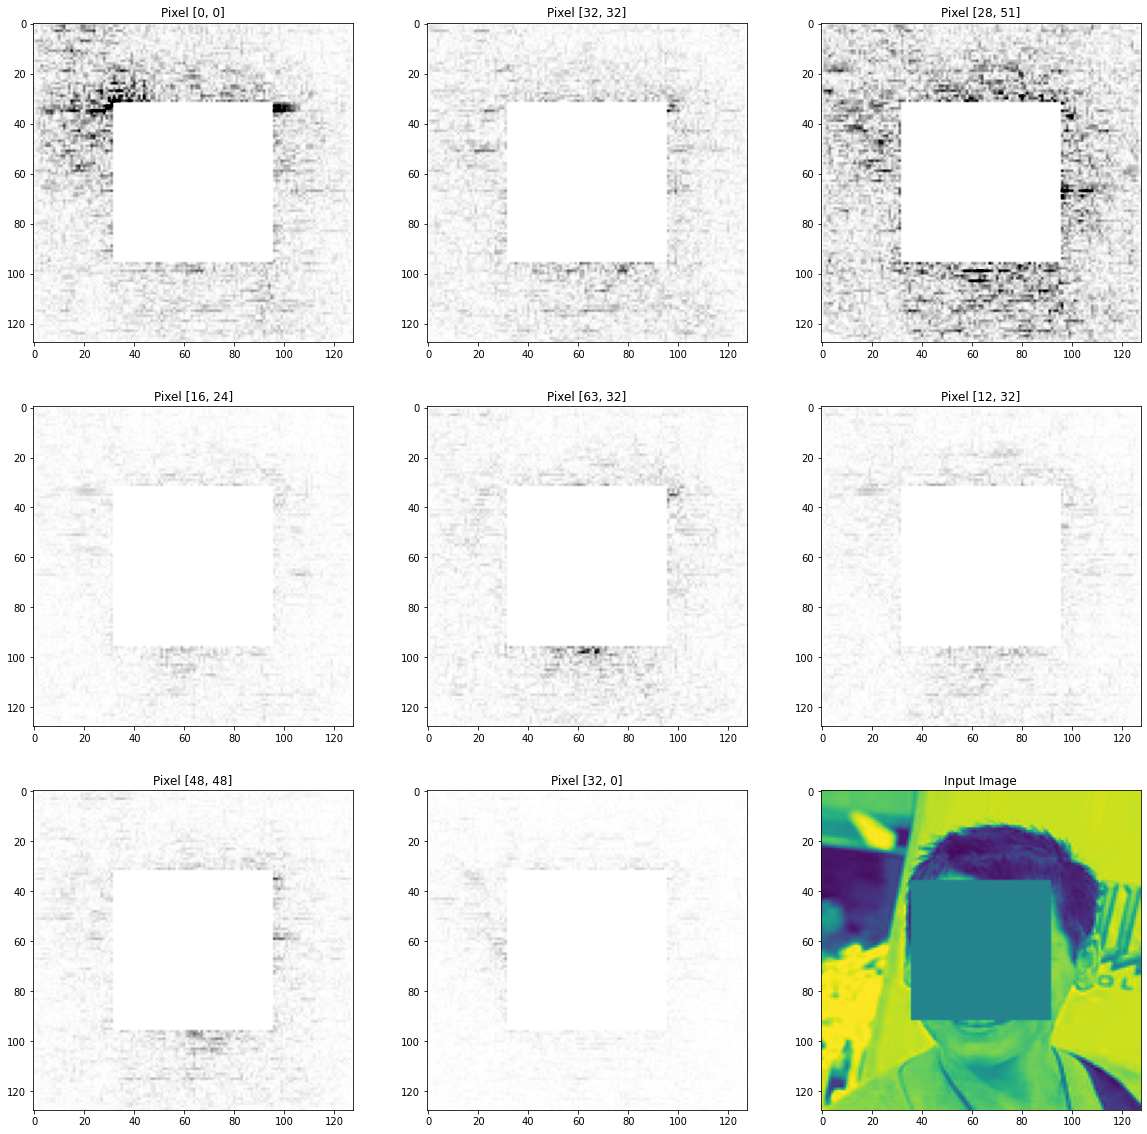

In [54]:
print("Weight from each input pixel on a specific output pixel")

# Looking for particular features
px0 = [0,0] 
px1 = [32,32] # Center
px2 = [28,63-12] # Eyes?
px3 = [16,24] # Other eye
px4 = [63,32] # Mouth
px5 = [12,32]
px6 = [48,48]
px7 = [32,0]
channel = 0

jacob_64_535[:,:,:,:,32:96,32:96] = 0
fig, ((ax0,ax1,ax2),(ax3, ax4, ax5),(ax6,ax7,ax8)) = plt.subplots(3, 3, figsize=(20,20))

ax0.set_title("Pixel "+str(px0))
ax1.set_title("Pixel "+str(px1))
ax2.set_title("Pixel "+str(px2))
ax3.set_title("Pixel "+str(px3))
ax4.set_title("Pixel "+str(px4))
ax5.set_title("Pixel "+str(px5))
ax6.set_title("Pixel "+str(px6))
ax7.set_title("Pixel "+str(px7))
ax8.set_title("Input Image")

im = ax0.imshow(abs(jacob_64_535[channel,px0[0],px0[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax1.imshow(abs(jacob_64_535[channel,px1[0],px1[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax2.imshow(abs(jacob_64_535[channel,px2[0],px2[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax3.imshow(abs(jacob_64_535[channel,px3[0],px3[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax4.imshow(abs(jacob_64_535[channel,px4[0],px4[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax5.imshow(abs(jacob_64_535[channel,px5[0],px5[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax6.imshow(abs(jacob_64_535[channel,px6[0],px6[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax7.imshow(abs(jacob_64_535[channel,px7[0],px7[1],0,:,:]),cmap='binary').set_norm(norm)
im = ax8.imshow(input_cropped_64_535[channel,:,:])

# fig.colorbar(im7,ax=im7,orientation='horizontal', fraction=.1)

### 16X16 image

In [55]:
vmin = 0
vmax = abs(jacob_16_535).max()*0.1
norm_16 = colors.Normalize(vmin=vmin, vmax=vmax)

Weight from each input pixel on a specific output pixel


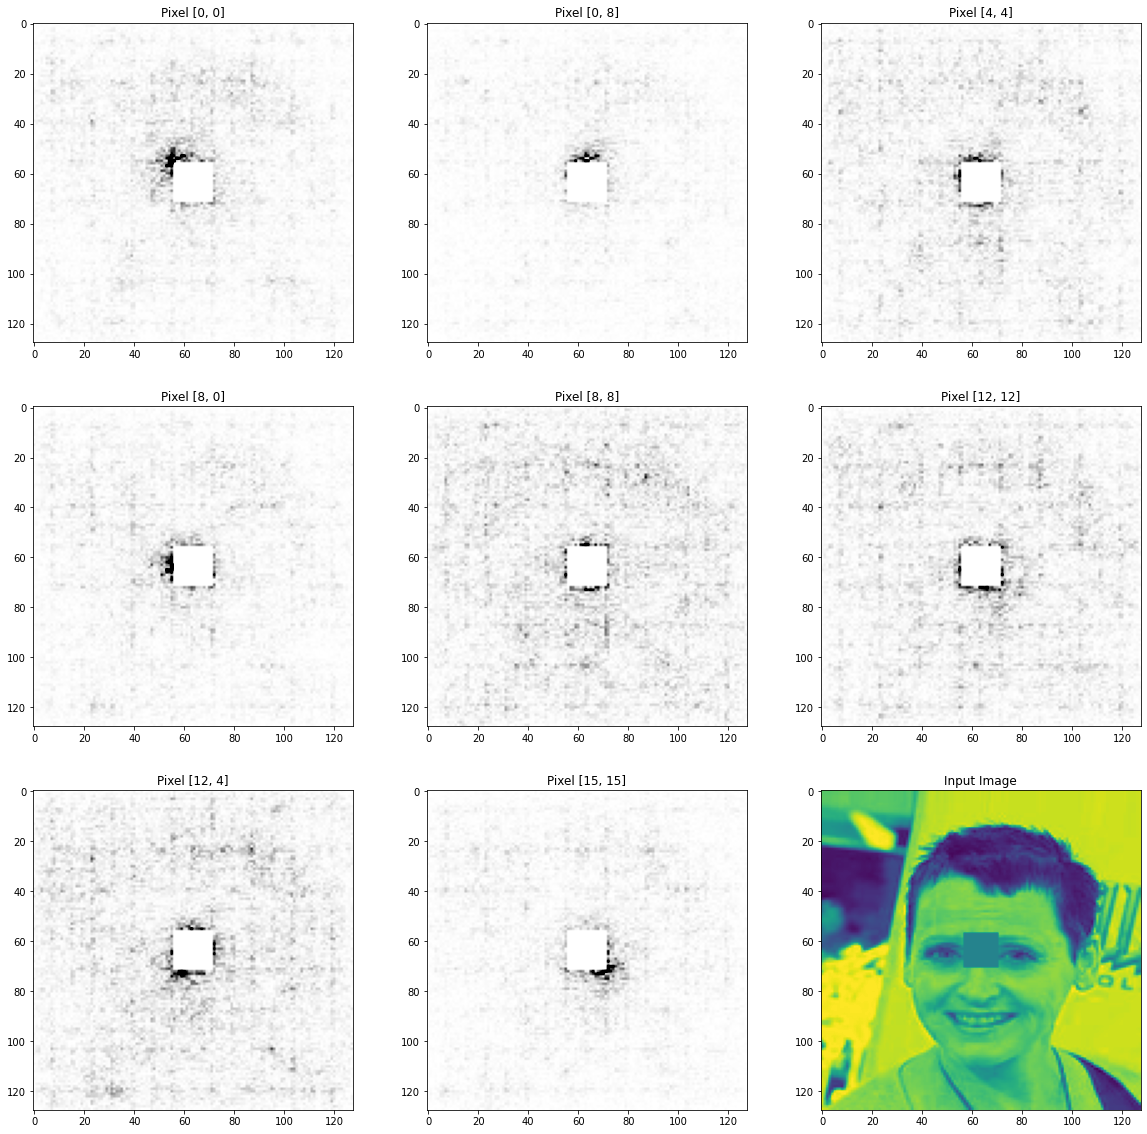

In [56]:
print("Weight from each input pixel on a specific output pixel")

# Looking for particular features
px0 = [0,0] 
px1 = [0,8] 
px2 = [4,4] 
px3 = [8,0] 
px4 = [8,8] 
px5 = [12,12] 
px6 = [12,4] 
px7 = [15,15]
channel = 0

jacob_16_535[:,:,:,:,56:72,56:72] = 0
fig, ((ax0,ax1,ax2),(ax3, ax4, ax5),(ax6,ax7,ax8)) = plt.subplots(3, 3, figsize=(20,20))

ax0.set_title("Pixel "+str(px0))
ax1.set_title("Pixel "+str(px1))
ax2.set_title("Pixel "+str(px2))
ax3.set_title("Pixel "+str(px3))
ax4.set_title("Pixel "+str(px4))
ax5.set_title("Pixel "+str(px5))
ax6.set_title("Pixel "+str(px6))
ax7.set_title("Pixel "+str(px7))
ax8.set_title("Input Image")

im = ax0.imshow(abs(jacob_16_535[channel,px0[0],px0[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax1.imshow(abs(jacob_16_535[channel,px1[0],px1[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax2.imshow(abs(jacob_16_535[channel,px2[0],px2[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax3.imshow(abs(jacob_16_535[channel,px3[0],px3[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax4.imshow(abs(jacob_16_535[channel,px4[0],px4[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax5.imshow(abs(jacob_16_535[channel,px5[0],px5[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax6.imshow(abs(jacob_16_535[channel,px6[0],px6[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax7.imshow(abs(jacob_16_535[channel,px7[0],px7[1],0,:,:]),cmap='binary').set_norm(norm_16)
im = ax8.imshow(input_cropped_16_535[channel,:,:])

# fig.colorbar(im7,ax=im7,orientation='horizontal', fraction=.1)